<a href="https://colab.research.google.com/github/Carmodann1311/IA_Calidadypreparacion/blob/main/Red_neorunal_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical

# Configurar Matplotlib para mostrar gráficos en el cuaderno
%matplotlib inline


In [17]:
import pandas as pd

# Cargar la base de datos
data = pd.read_csv("/content/Desecion escolar Universidad .csv")



In [18]:
# Eliminar la columna ID (si existe) porque no es útil para la predicción
if 'ID' in data.columns:
    data = data.drop('ID', axis=1)

# Convertir variables categóricas en variables dummy
data = pd.get_dummies(data, drop_first=True)

# Separar características y objetivo
X = data.drop('desercion', axis=1)
y = data['desercion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico si es necesario
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


KeyError: "['desercion'] not found in axis"

In [19]:
# Crear el modelo RNN
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


NameError: name 'X_train' is not defined

In [20]:
# Reshape de los datos para LSTM [samples, time steps, features]
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Entrenar el modelo
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))


NameError: name 'X_train' is not defined

In [21]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Pérdida: {loss}, Precisión: {accuracy}')


NameError: name 'X_test_reshaped' is not defined

NameError: name 'history' is not defined

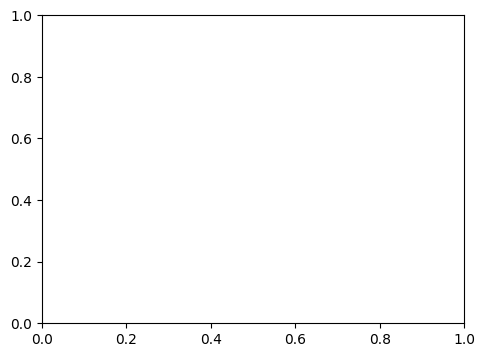

In [22]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()
